# Assignment 4: C8
Description: Long-term Forecasting. Create a cointegration system of predicting a financial asset with your choice (do not overlap each other). You need to add some economic variables to your original database or create a new database if necessary. You must include unit root test, error correction model, engle-granger 2 step approach, spurious regression and other in Chapter 8.

# Covered Processes:
## Stationarity & Unit Root Tests: ADF, ADF GLS, KPSS, Philips-Perron
## Johansen Cointegration
## ECM, VECM Models & VECM Forecast

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

In [9]:
# Define the stock symbols and date range
stocks = ['NERD', 'TCEHY', 'BILI']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

[*********************100%%**********************]  3 of 3 completed


In [10]:
print(weekly_stock_prices.head)

<bound method NDFrame.head of                  BILI       NERD      TCEHY
Date                                       
2019-06-14  14.270000  15.001804  38.982117
2019-06-21  15.440000  15.540592  42.397839
2019-06-28  16.270000  15.315280  42.239178
2019-07-05  16.740000  15.475938  42.603149
2019-07-12  16.400000  15.301566  42.388500
...               ...        ...        ...
2021-09-17  74.440002  26.737728  55.263988
2021-09-24  70.730003  26.300705  54.672878
2021-10-01  64.879997  25.307476  55.188923
2021-10-08  70.959999  25.804090  59.289150
2021-10-15  70.089996  26.140797  60.039768

[123 rows x 3 columns]>


In [11]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [13]:
result = adfuller(weekly_stock_prices['NERD', 'TCEHY', 'BILI'])

print('Augmented Dickey-Fuller Test:')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Check for stationarity
if result[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")

KeyError: ('NERD', 'TCEHY', 'BILI')

The issue with your code is in the line where you're trying to pass multiple stock symbols ('NERD', 'TCEHY', 'BILI') to the adfuller function. The adfuller function expects a single time series data as input, but you're passing a list of stock symbols, which is causing the KeyError.

To perform the Augmented Dickey-Fuller (ADF) test separately for each stock, you should loop through the list of stock symbols and apply the test to each one individually. 

The correct code is below.

This code will loop through each stock symbol in the stocks list and perform the ADF test for each one separately, printing the results for each stock.

In [15]:
for stock_symbol in stocks:
    result = adfuller(weekly_stock_prices[stock_symbol])
    
    print(f'Augmented Dickey-Fuller Test for {stock_symbol}:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    # Check for stationarity
    if result[1] <= 0.05:
        print(f"The time series for {stock_symbol} is likely stationary.")
    else:
        print(f"The time series for {stock_symbol} is likely non-stationary.")

Augmented Dickey-Fuller Test for NERD:
ADF Statistic: -1.0348116563547727
p-value: 0.7403568069007445
Critical Values:
   1%: -3.485585145896754
   5%: -2.885738566292665
   10%: -2.5796759080663887
The time series for NERD is likely non-stationary.
Augmented Dickey-Fuller Test for TCEHY:
ADF Statistic: -1.3086622973616475
p-value: 0.6252000427802124
Critical Values:
   1%: -3.487517288664615
   5%: -2.8865777180380032
   10%: -2.5801239192052012
The time series for TCEHY is likely non-stationary.
Augmented Dickey-Fuller Test for BILI:
ADF Statistic: -1.2076512805857855
p-value: 0.6702956940194195
Critical Values:
   1%: -3.4851223522012855
   5%: -2.88553750045158
   10%: -2.5795685622144586
The time series for BILI is likely non-stationary.


In [18]:
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

ModuleNotFoundError: No module named 'arch'

In [19]:
pip install <arch>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `/Users/khizarbilal/anaconda3/bin/python -m pip install <arch>'
Note: you may need to restart the kernel to use updated packages.


In [20]:
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

ModuleNotFoundError: No module named 'arch'

In [21]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.2/950.2 kB 618.8 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

In [23]:
res = DFGLS(weekly_stock_prices[stock_symbol])

In [24]:
print(res)

      Dickey-Fuller GLS Results      
Test Statistic                 -0.559
P-value                         0.494
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -2.73 (1%), -2.11 (5%), -1.79 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/arch/unitroot/unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = stat = resols.tvalues[0]
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/arch/unitroot/unitroot.py:955: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = resols.tvalues[0]


In [25]:
res = DFGLS(weekly_stock_prices['NERD'])

In [26]:
print(res)

      Dickey-Fuller GLS Results      
Test Statistic                 -0.311
P-value                         0.577
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -2.73 (1%), -2.11 (5%), -1.79 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/arch/unitroot/unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = stat = resols.tvalues[0]
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/arch/unitroot/unitroot.py:955: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = resols.tvalues[0]


In [27]:
res = DFGLS(weekly_stock_prices['TCEHY'])

In [28]:
print(res)

      Dickey-Fuller GLS Results      
Test Statistic                 -0.489
P-value                         0.528
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -2.73 (1%), -2.11 (5%), -1.80 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/arch/unitroot/unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = stat = resols.tvalues[0]
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/arch/unitroot/unitroot.py:955: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = resols.tvalues[0]


In [29]:
res = DFGLS(weekly_stock_prices['BILI'])
print(res)

      Dickey-Fuller GLS Results      
Test Statistic                 -0.559
P-value                         0.494
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -2.73 (1%), -2.11 (5%), -1.79 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/arch/unitroot/unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = stat = resols.tvalues[0]
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/arch/unitroot/unitroot.py:955: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = resols.tvalues[0]


In [30]:
res = KPSS(weekly_stock_prices['BILI'])
print(res)

    KPSS Stationarity Test Results   
Test Statistic                  1.471
P-value                         0.000
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [31]:
res = KPSS(weekly_stock_prices['TCEHY'])
print(res)

    KPSS Stationarity Test Results   
Test Statistic                  1.324
P-value                         0.000
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [32]:
res = KPSS(weekly_stock_prices['NERD'])
print(res)

    KPSS Stationarity Test Results   
Test Statistic                  1.565
P-value                         0.000
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [34]:
res1 = PhillipsPerron(weekly_stock_prices['BILI'])
res2 = PhillipsPerron(weekly_stock_prices['TCEHY'])
res3 = PhillipsPerron(weekly_stock_prices['NERD'])
print(res1)
print(res2)
print(res3)

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.327
P-value                         0.617
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.459
P-value                         0.554
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.125
P-value                         0.705
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58 (10%)
Nu

/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/arch/unitroot/unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = resols.bse[0]
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/arch/unitroot/unitroot.py:1142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = resols.params[0]
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/arch/unitroot/unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

In [67]:
from statsmodels.tsa.stattools import coint

In [68]:
# Define the stock symbols and date range
stocks = ['NERD', 'TCEHY']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

[*********************100%%**********************]  2 of 2 completed


In [69]:
# Differencing the stock prices
differenced_stock_prices = weekly_stock_prices.diff().dropna()

# Running a cointegration test
result = coint(differenced_stock_prices['TCEHY'], differenced_stock_prices[['NERD']])

print('Cointegration Test Results:')
print('Test Statistic:', result[0])
print('P-Value:', result[1])
print('Critical Values:', result[2])

Cointegration Test Results:
Test Statistic: -5.804292739871811
P-Value: 4.24016752571521e-06
Critical Values: [-3.98924151 -3.38709271 -3.07968702]


In [70]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen


In [71]:
result = coint_johansen(differenced_stock_prices, det_order=0, k_ar_diff=1)
print('Johansen Cointegration Test Results:')
print('Trace Statistic:', result.lr1)
print('Critical Values (Trace):', result.cvt)
print('Eigen Statistic:', result.lr2)
print('Critical Values (Eigen):', result.cvm)

# Determine the number of cointegrating relationships
num_cointegrating_relations = result.lr1.shape[0] - (result.lr1 > result.cvt).sum()
print('Number of Cointegrating Relations:', num_cointegrating_relations)

Johansen Cointegration Test Results:
Trace Statistic: [102.03355879  41.27923693]
Critical Values (Trace): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Eigen Statistic: [60.75432186 41.27923693]
Critical Values (Eigen): [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


ValueError: operands could not be broadcast together with shapes (2,) (2,3) 

In [40]:
from statsmodels.tsa.vector_ar.vecm import VECM

# Specify candidate lag orders for the ECT
lag_orders = range(1, 10)  # Example range of lag orders

# Fit VECM models with different lag orders for the ECT and compare AIC/BIC
best_aic = float('inf')
best_bic = float('inf')
best_lag_order = None

for lag_order in lag_orders:
    model = VECM(differenced_stock_prices, k_ar_diff=1, coint_rank=num_cointegrating_relations, 
                 trend='c', steps=lag_order)
    model_fit = model.fit()
    
    if model_fit.aic < best_aic:
        best_aic = model_fit.aic
        best_lag_order = lag_order
    
    if model_fit.bic < best_bic:
        best_bic = model_fit.bic
        best_lag_order = lag_order

TypeError: VECM.__init__() got an unexpected keyword argument 'trend'

In [42]:
# Define a range of lag orders to consider
max_lag = 10  # Example maximum lag order
results = []

for lag_order in range(1, max_lag + 1):
    model = VAR(differenced_stock_prices)
    model_fitted = model.fit(lag_order)
    results.append({'lag_order': lag_order, 'aic': model_fitted.aic, 'bic': model_fitted.bic})

# Find the lag order with the lowest AIC and BIC
best_aic_model = min(results, key=lambda x: x['aic'])
best_bic_model = min(results, key=lambda x: x['bic'])

# Print the results
print("AIC: Lowest AIC (Lag Order):", best_aic_model['aic'], best_aic_model['lag_order'])
print("BIC: Lowest BIC (Lag Order):", best_bic_model['bic'], best_bic_model['lag_order'])


AIC: Lowest AIC (Lag Order): 4.071695899522556 1
BIC: Lowest BIC (Lag Order): 4.3489643833833895 1


In [43]:
# Perform the Johansen cointegration test
result = coint_johansen(differenced_stock_prices, det_order=0, k_ar_diff=1)

# Print the results
print('Johansen Cointegration Test Results:')
print('Trace Statistic:', result.lr1)
print('Critical Values (Trace):', result.cvt)
print('Eigen Statistic:', result.lr2)
print('Critical Values (Eigen):', result.cvm)

# Determine the number of cointegrating relationships
num_cointegrating_relations = result.lr1.shape[0] - (result.lr1 > result.cvt).sum()
print('Number of Cointegrating Relations:', num_cointegrating_relations)

# Choose the appropriate lag order for VAR based on your analysis and needs
lag_order_for_var = 1

# Fit VAR model with the selected lag order
model = VAR(differenced_stock_prices)
model_fitted = model.fit(lag_order_for_var)

# Extract the Error Correction Term (ECT) from the VAR model
ect = model_fitted.orth_ma_rep


Johansen Cointegration Test Results:
Trace Statistic: [156.88904478  90.68377527  40.966527  ]
Critical Values (Trace): [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Eigen Statistic: [66.20526951 49.71724827 40.966527  ]
Critical Values (Eigen): [[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
Number of Cointegrating Relations: -6


In [4]:
pip install yfinance

  Using cached yfinance-0.2.31-py2.py3-none-any.whl (65 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 6.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached frozendict-2.3.8-cp310-cp310-macosx_10_9_x86_64.whl (36 kB)
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-macosx_10_9_x86_64.whl size=252316 sha256=5eeb96789c0ac98d77ee8df331d4adc60a626fb4a19077ef804eaad66e64b7c3
  Stored in directory: /Users/khizarbilal/Library/Caches/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstal

In [5]:
import yfinance as yf
stocks = ['NERD', 'TCEHY']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

[*********************100%%**********************]  2 of 2 completed


In [8]:
weekly_stock_prices.head

<bound method NDFrame.head of                  NERD      TCEHY
Date                            
2019-06-14  15.001804  38.982113
2019-06-21  15.540591  42.397835
2019-06-28  15.315280  42.239178
2019-07-05  15.475937  42.603149
2019-07-12  15.301566  42.388500
...               ...        ...
2021-09-17  26.737728  55.263985
2021-09-24  26.300705  54.672874
2021-10-01  25.307476  55.188923
2021-10-08  25.804090  59.289150
2021-10-15  26.140797  60.039772

[123 rows x 2 columns]>

In [13]:
pip install arch

  Using cached arch-6.2.0-cp310-cp310-macosx_10_9_x86_64.whl (950 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
stocks = ['NERD', 'TCEHY']
start_date = '2019-06-10'
end_date = '2021-10-17'

stock_data = yf.download(stocks, start=start_date, end=end_date)
stock_prices = stock_data['Adj Close']
data = stock_prices.resample('W-FRI').last()

[*********************100%%**********************]  2 of 2 completed


In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from arch.unitroot import DFGLS

In [3]:
data['lNERD'] = data['NERD'].apply(lambda x : np.log(x)) 
data['lTCEHY'] = data['TCEHY'].apply(lambda x : np.log(x)) 

formula = 'lNERD ~ lTCEHY'
results = smf.ols(formula, data).fit()

residuals = results.resid
lspot_fit = results.fittedvalues

/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


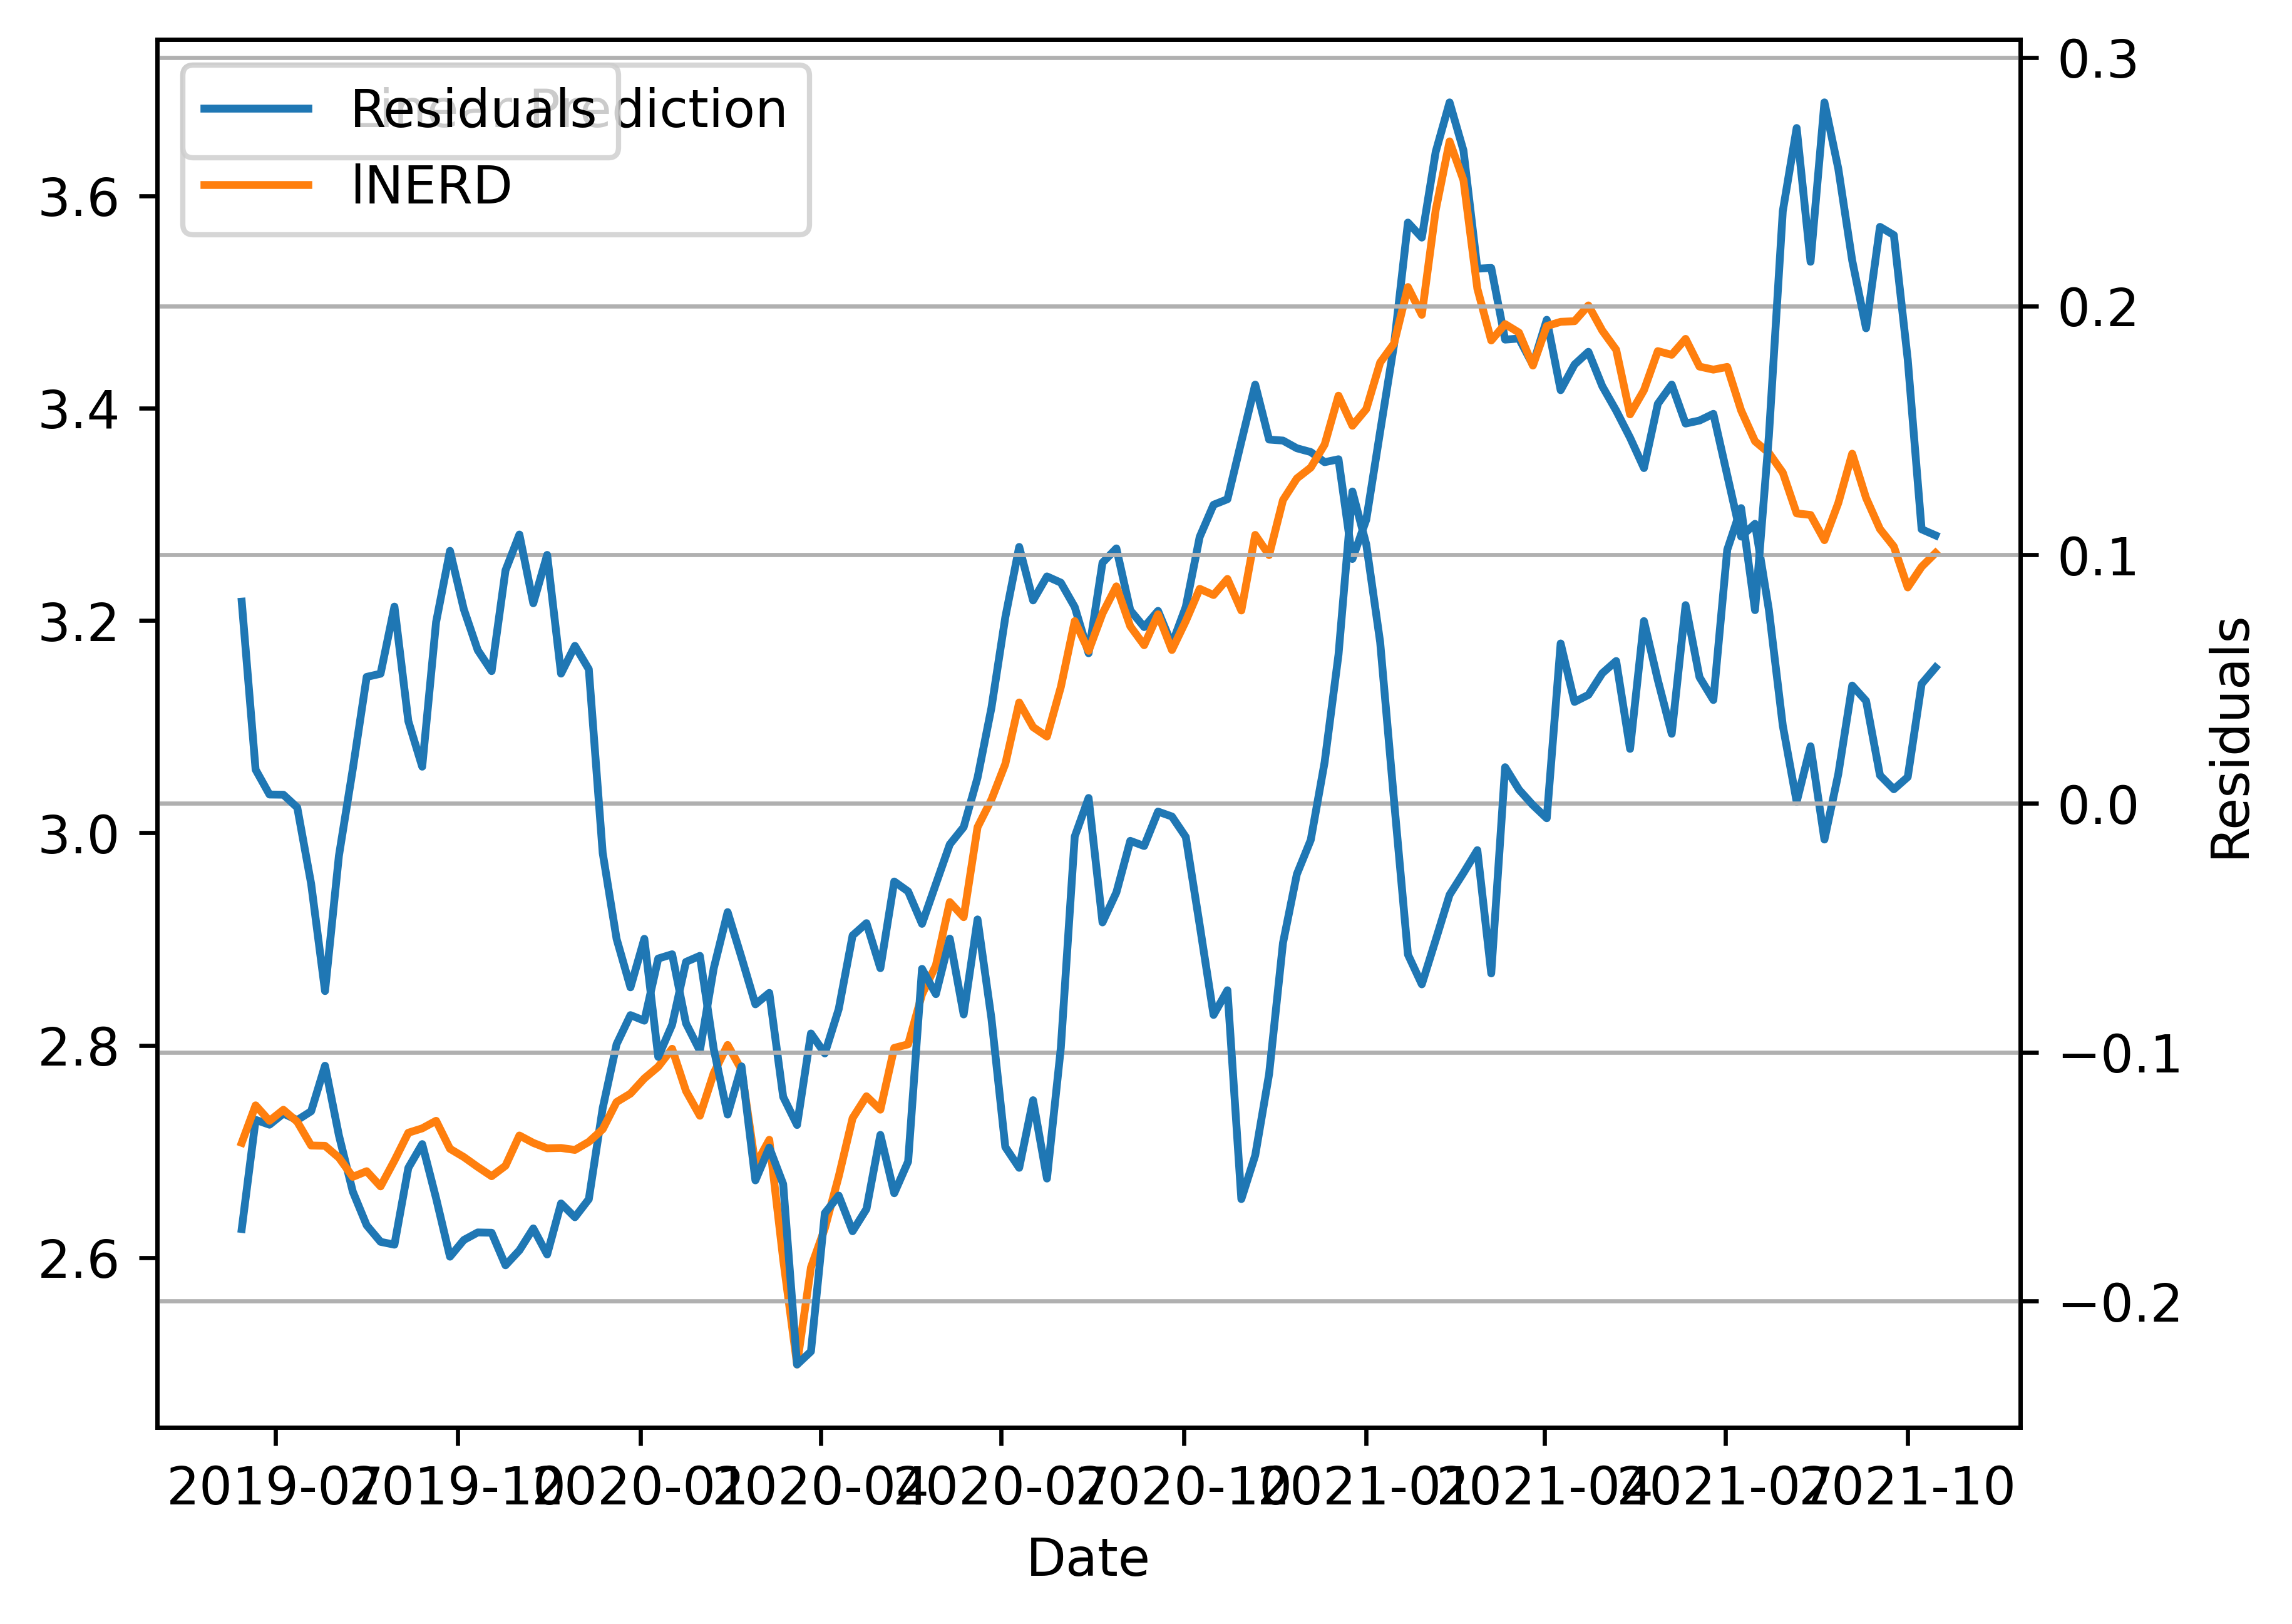

In [10]:
fig = plt.figure(1, dpi=600)
ax1 = fig.add_subplot(111)
ax1.plot(lspot_fit, label='Linear Prediction')
ax1.plot(data['lNERD'], label='lNERD')
ax1.set_xlabel('Date') 
ax1.legend(loc=0)  

ax2 = plt.twinx()
ax2.set_ylabel('Residuals')
ax2.plot(residuals, label='Residuals')
ax2.legend(loc=0) 

plt.grid(True)
plt.show()

In [8]:
res = DFGLS(residuals, max_lags=12)
print(res.summary())

      Dickey-Fuller GLS Results      
Test Statistic                 -1.592
P-value                         0.109
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -2.73 (1%), -2.11 (5%), -1.80 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/arch/unitroot/unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = stat = resols.tvalues[0]
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/arch/unitroot/unitroot.py:955: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = resols.tvalues[0]


In [11]:
# Error Correction Model
# specification 1: rspot rfutures L.resid
def LogDiff(x):
    x_diff = 100*np.log(x/x.shift(1))
    x_diff = x_diff.dropna()
    return x_diff

data['rTCEHY'] = LogDiff(data['TCEHY'])
data['rNERD'] = LogDiff(data['NERD'])
data['lresid'] = residuals.shift(1)
formula = 'rTCEHY ~ rNERD + lresid'
results = smf.ols(formula, data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rTCEHY   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     46.52
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.19e-15
Time:                        21:18:38   Log-Likelihood:                -309.03
No. Observations:                 122   AIC:                             624.1
Df Residuals:                     119   BIC:                             632.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0175      0.281      0.062      0.9

/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _

In [12]:
# specification 2: rspot rfutures L.rspot L.rfutures
formula = 'rTCEHY ~ rNERD + lTCEHY + lNERD'
results = smf.ols(formula, data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rTCEHY   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     32.14
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.94e-15
Time:                        21:19:54   Log-Likelihood:                -307.84
No. Observations:                 122   AIC:                             623.7
Df Residuals:                     118   BIC:                             634.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.5523      6.728     -1.420      0.1

/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/khizarbilal/anaconda3/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _

In [13]:
from statsmodels.tsa.vector_ar import vecm

In [25]:
import yfinance as yf
stocks = ['NERD', 'TCEHY','000300.SS']
start_date = '2019-06-10'
end_date = '2021-10-17'

stock_data = yf.download(stocks, start=start_date, end=end_date)
data = stock_data['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [27]:
model = vecm.select_order(data,maxlags=10)
print(model.summary())

LinAlgError: SVD did not converge in Linear Least Squares

In [29]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VECM

In [72]:
# Download data
stocks = ['NERD', 'TCEHY']
start_date = '2019-06-10'
end_date = '2021-10-17'
stock_data = yf.download(stocks, start=start_date, end=end_date)
data = stock_data['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [73]:
model = vecm.select_order(data,maxlags=12)
print(model.summary())

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -1.697     -1.652*      0.1833     -1.679*
1       -1.706      -1.631      0.1815      -1.677
2      -1.717*      -1.611     0.1797*      -1.676
3       -1.716      -1.581      0.1797      -1.664
4       -1.710      -1.545      0.1808      -1.646
5       -1.702      -1.507      0.1823      -1.626
6       -1.690      -1.465      0.1846      -1.602
7       -1.706      -1.451      0.1816      -1.606
8       -1.701      -1.415      0.1826      -1.589
9       -1.698      -1.383      0.1831      -1.575
10      -1.686      -1.341      0.1853      -1.551
11      -1.677      -1.302      0.1869      -1.531
12      -1.675      -1.270      0.1874      -1.517
--------------------------------------------------


In [74]:
vec_rank1 = vecm.select_coint_rank(data, 0, 2, 
                             method = 'trace', signif=0.01)
print(vec_rank1.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          13.03          19.93
-------------------------------------


In [34]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM


In [37]:
import yfinance as yf
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM

# Download data
stocks = ['NERD', 'TCEHY', 'BABA']
start_date = '2019-06-10'
end_date = '2021-10-17'
stock_data = yf.download(stocks, start=start_date, end=end_date)
data = stock_data['Adj Close']

# Check for missing values
if data.isnull().values.any():
    data = data.dropna()

# Perform the Johansen cointegration test
coint_result = coint_johansen(data, det_order=0, k_ar_diff=5)

# Determine the cointegration rank using the trace statistic (adjust as needed)
coint_rank_trace = np.sum(coint_result.lr1 >= coint_result.cvt[:, 1])

# Create the VECM model
model = VECM(data, deterministic="c", k_ar_diff=5, coint_rank=coint_rank_trace)

# Fit the model
model_fitted = model.fit()

# Print the summary
print(model_fitted.summary())


[*********************100%%**********************]  3 of 3 completed


IndexError: index 30 is out of bounds for axis 0 with size 0

In [24]:
vec_rank1 = vecm.select_coint_rank(data, 0, 2,
                             method = 'trace', signif=0.01)
vec_rank1.rank
vec_rank1.summary()
print(vec_rank1)

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          13.03          19.93
-------------------------------------


In [50]:
vec_rank2 = vecm.select_coint_rank(data, 0, 3,
                             method = 'maxeig', signif=0.01)
print(vec_rank2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          12.16          25.86
-------------------------------------


In [51]:
model = vecm.VECM(data, k_ar_diff=1,coint_rank=1,deterministic='co')
res = model.fit()
print(res.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation BABA
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0608      0.310     -0.197      0.844      -0.668       0.546
L1.BABA       -0.0678      0.056     -1.202      0.229      -0.178       0.043
L1.NERD        0.6649      0.787      0.844      0.398      -0.879       2.208
L1.TCEHY      -0.1392      0.227     -0.614      0.539      -0.584       0.305
Det. terms outside the coint. relation & lagged endog. parameters for equation NERD
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0127      0.022     -0.567      0.570      -0.057       0.031
L1.BABA       -0.0093      0.004     -2.275      0.023      -0.017      -0.001
L1.NERD        0.0771      0.057      1.35

In [53]:
stocks = ['NERD', 'TCEHY']
start_date = '2019-06-10'
end_date = '2021-10-17'
stock_data = yf.download(stocks, start=start_date, end=end_date)
data = stock_data['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [54]:
model = vecm.select_order(data,maxlags=12)
print(model.summary())

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -1.697     -1.652*      0.1833     -1.679*
1       -1.706      -1.631      0.1815      -1.677
2      -1.717*      -1.611     0.1797*      -1.676
3       -1.716      -1.581      0.1797      -1.664
4       -1.710      -1.545      0.1808      -1.646
5       -1.702      -1.507      0.1823      -1.626
6       -1.690      -1.465      0.1846      -1.602
7       -1.706      -1.451      0.1816      -1.606
8       -1.701      -1.415      0.1826      -1.589
9       -1.698      -1.383      0.1831      -1.575
10      -1.686      -1.341      0.1853      -1.551
11      -1.677      -1.302      0.1869      -1.531
12      -1.675      -1.270      0.1874      -1.517
--------------------------------------------------


In [55]:
vec_rank1 = vecm.select_coint_rank(data, 0, 2, 
                             method = 'trace', signif=0.01)
print(vec_rank1.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          13.03          19.93
-------------------------------------


In [57]:
res.predict(steps=24)

array([[167.70250712,  26.13851157,  60.0069357 ],
       [167.7284449 ,  26.15852625,  60.04914639],
       [167.73695098,  26.17728937,  60.07912673],
       [167.74746825,  26.19610191,  60.1102191 ],
       [167.75770207,  26.21488732,  60.14124096],
       [167.76792174,  26.23366137,  60.17230321],
       [167.77810513,  26.25242325,  60.20339233],
       [167.78825604,  26.27117355,  60.23450843],
       [167.79837549,  26.28991273,  60.26565035],
       [167.80846475,  26.30864121,  60.29681708],
       [167.818525  ,  26.32735942,  60.32800764],
       [167.82855736,  26.34606776,  60.3592211 ],
       [167.83856295,  26.36476661,  60.39045656],
       [167.8485428 ,  26.38345635,  60.42171316],
       [167.85849794,  26.40213734,  60.45299007],
       [167.86842932,  26.42080992,  60.48428649],
       [167.87833788,  26.43947441,  60.51560165],
       [167.88822452,  26.45813114,  60.54693483],
       [167.89809009,  26.47678042,  60.57828531],
       [167.90793542,  26.49542

In [59]:
res.predict(steps=24, alpha=0.05)
for text, vaĺues in zip(("forecast", "lower", "upper"), res.predict(steps=10, alpha=0.05)):
    print(text+":", vaĺues, sep="\n")

forecast:
[[167.70250712  26.13851157  60.0069357 ]
 [167.7284449   26.15852625  60.04914639]
 [167.73695098  26.17728937  60.07912673]
 [167.74746825  26.19610191  60.1102191 ]
 [167.75770207  26.21488732  60.14124096]
 [167.76792174  26.23366137  60.17230321]
 [167.77810513  26.25242325  60.20339233]
 [167.78825604  26.27117355  60.23450843]
 [167.79837549  26.28991273  60.26565035]
 [167.80846475  26.30864121  60.29681708]]
lower:
[[157.34743281  25.38797967  57.07995856]
 [153.55745878  25.08993001  56.15474998]
 [150.5448299   24.86396408  55.413177  ]
 [147.99112992  24.67660873  54.79739934]
 [145.73022179  24.51343579  54.26278417]
 [143.67968583  24.36728068  53.78738617]
 [141.78942064  24.23388911  53.35753683]
 [140.02653525  24.11050169  52.96413681]
 [138.36803691  23.99520925  52.60074218]
 [136.79710998  23.88662803  52.26258661]]
upper:
[[178.05758144  26.88904346  62.93391283]
 [181.89943103  27.22712248  63.94354279]
 [184.92907205  27.49061467  64.74507647]
 [187.50

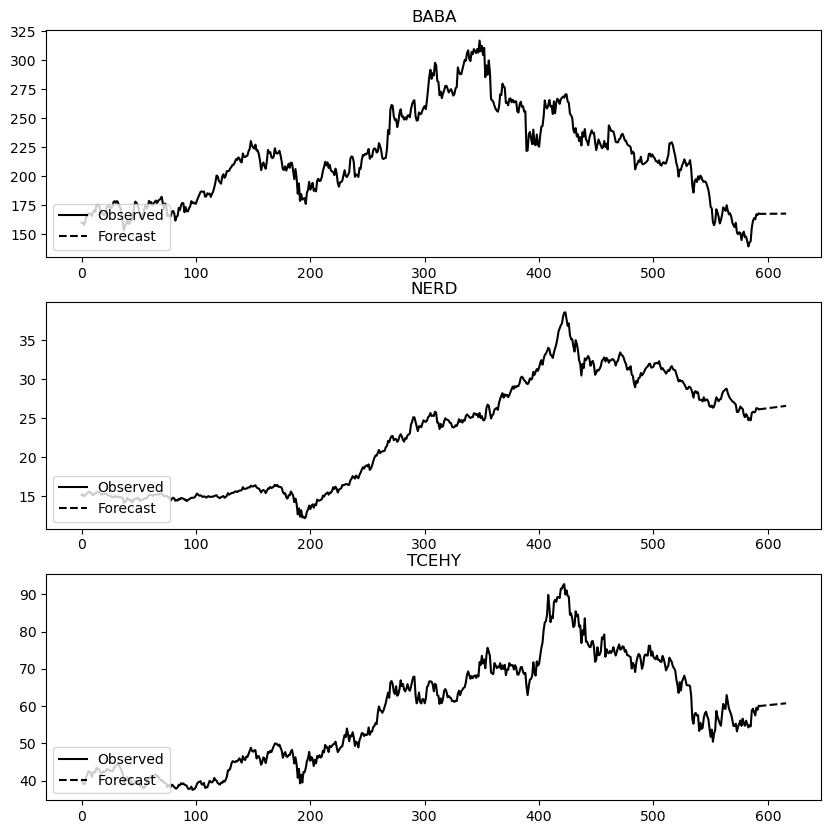

In [61]:
res.plot_forecast(steps=24, plot_conf_int=False)


In [62]:
# Assuming 'vecm_res' is your fitted VECM model
# And you've forecasted 10 steps ahead with vecm_res.predict(steps=10)
forecasted_values = res.predict(steps=24)

# Convert the NumPy array to a pandas DataFrame
forecast_df = pd.DataFrame(forecasted_values, columns=['BABA_forecast', 'NERD_forecast', 'BABA_forecast'])

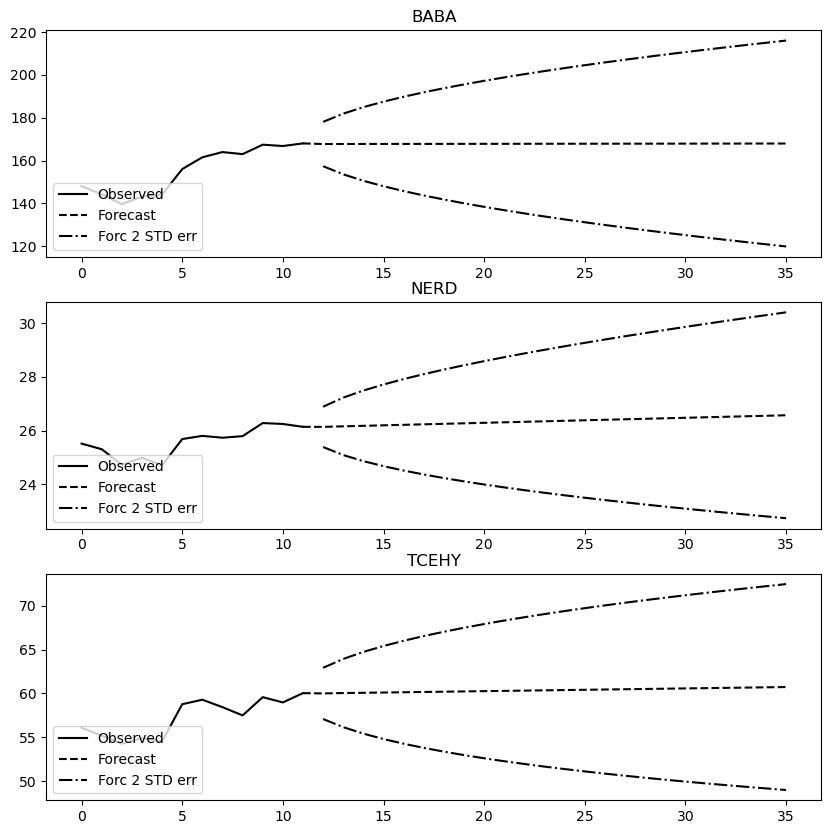

In [63]:
res.plot_forecast(steps=24, n_last_obs=12)